In [184]:
import pandas as pd
import pyodbc
import matplotlib.pyplot  as plt
import matplotlib.colors as mcolors
import numpy as np
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [2]:
cnxn_str = ("DRIVER={ODBC Driver 17 for SQL Server};"
            "SERVER=localhost,1433;"
            "DATABASE=MassiveInfinity;"
            "UID=sa;"
            "PWD=Abcd1234!;")

In [3]:
cnxn = pyodbc.connect(cnxn_str)

cursor = cnxn.cursor()
cursor.execute("SELECT TOP(1000) * FROM population")

In [166]:
df_population = pd.read_sql("SELECT * FROM population", cnxn)
df_accidents = pd.read_sql("SELECT * FROM accidents", cnxn)
df_unemployment = pd.read_sql("SELECT * FROM unemployment", cnxn)
df_immigrants_nationality = pd.read_sql("SELECT * FROM immigrants_by_nationality", cnxn)
df_immigrants_emigrants_age = pd.read_sql("SELECT * FROM immigrants_emigrants_by_age", cnxn)

<h1>POPULATION % BY DISTRICTS

In [141]:
dfp = df_population.groupby(['District_Name']).sum()

In [33]:
dfp['Number']

District_Name
Ciutat Vella            505596
Eixample               1322624
Gràcia                  603888
Horta-Guinardó          837271
Les Corts               408045
Nou Barris              826372
Sant Andreu             733648
Sant Martí             1168555
Sants-Montjuïc          907153
Sarrià-Sant Gervasi     735166
Name: Number, dtype: int64

In [35]:
dfp.index

Index(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts',
       'Nou Barris', 'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc',
       'Sarrià-Sant Gervasi'],
      dtype='object', name='District_Name')

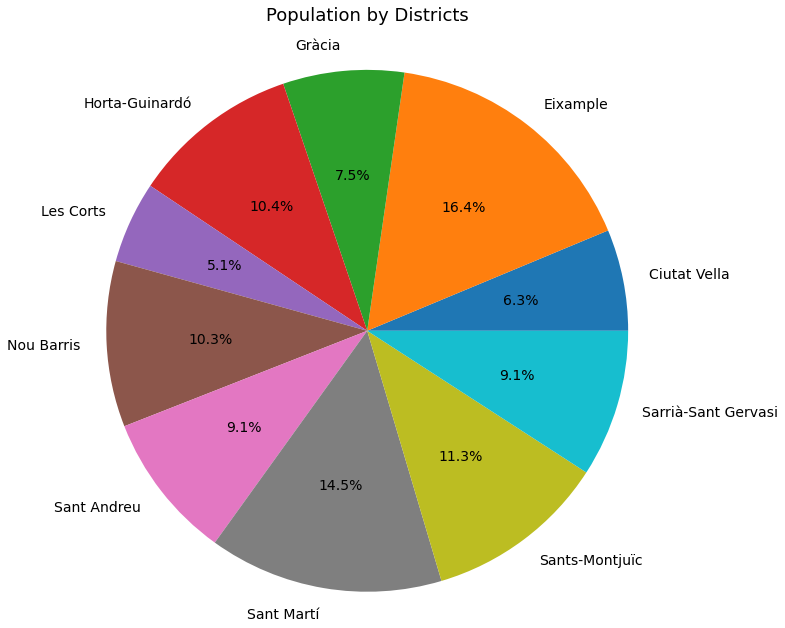

In [ ]:
plt.pie(dfp['Number'], labels = dfp.index, autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Population by Districts',y=1.9, fontsize=18)
plt.show()

<h1>UNEMPLOYMENT BY DISTRICTS

In [164]:
dfu = df_unemployment.groupby(['District_Name']).sum()
dfu = dfu.sort_values('Number')

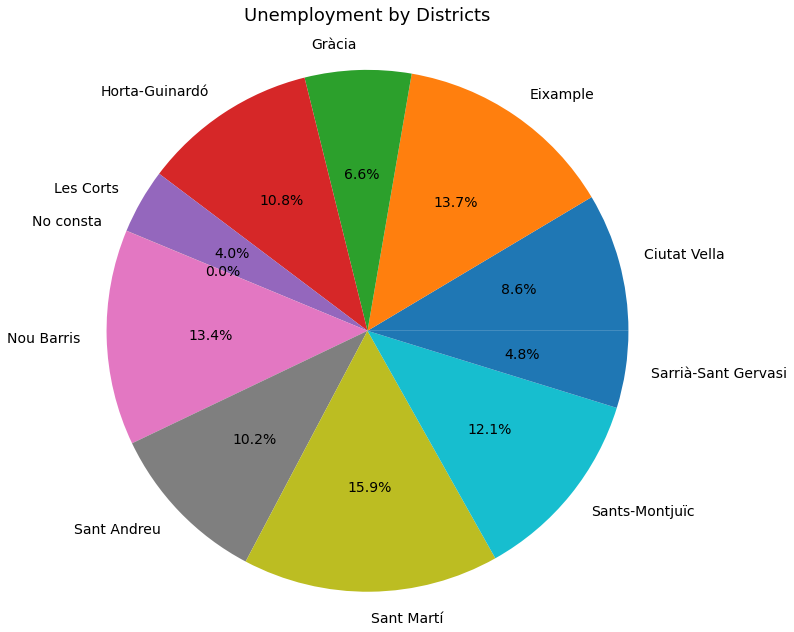

In [68]:
plt.pie(dfu['Number'], labels = dfu.index, autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Unemployment by Districts',y=1.9, fontsize=18)
plt.show()

<h1>ACCIDENTS BY DISTRICTS

In [73]:
dfa = df_accidents.groupby(['District_Name']).count()

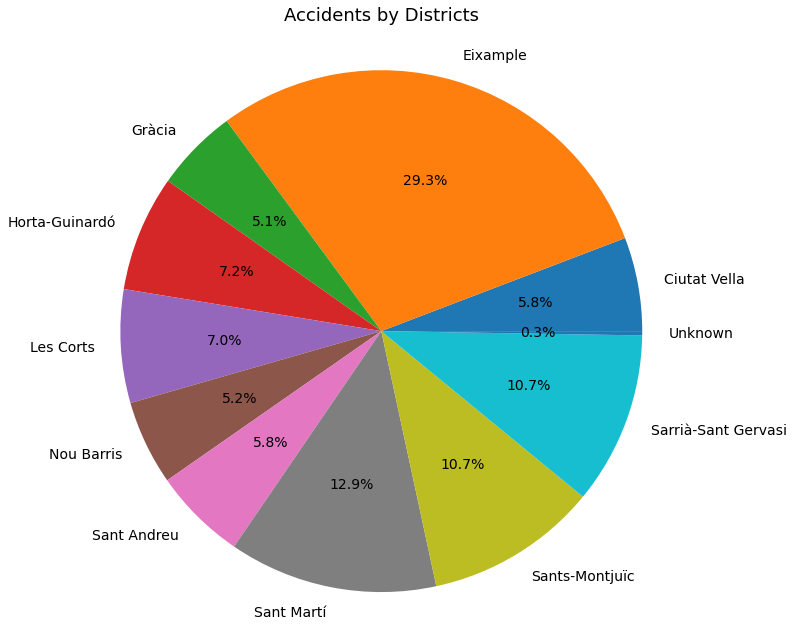

In [74]:
plt.pie(dfa['Id'], labels = dfa.index, autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Accidents by Districts',y=1.9, fontsize=18)
plt.show()

<h1>IMMIGRANTS BY NATIONALITY

In [118]:
dfin = df_immigrants_nationality.groupby(['Nationality']).sum()
dfin = dfin.sort_values('Number')
dfin2 = dfin.reset_index(level=0)

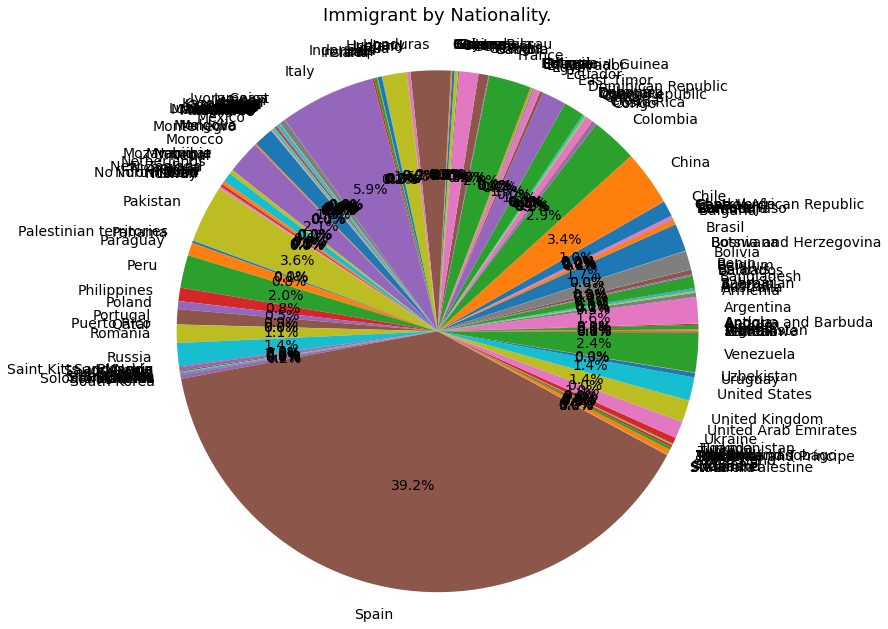

In [108]:
plt.pie(dfin2['Number'], labels = dfin2['Nationality'], autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Immigrant by Nationality.',y=1.9, fontsize=18)
plt.show()

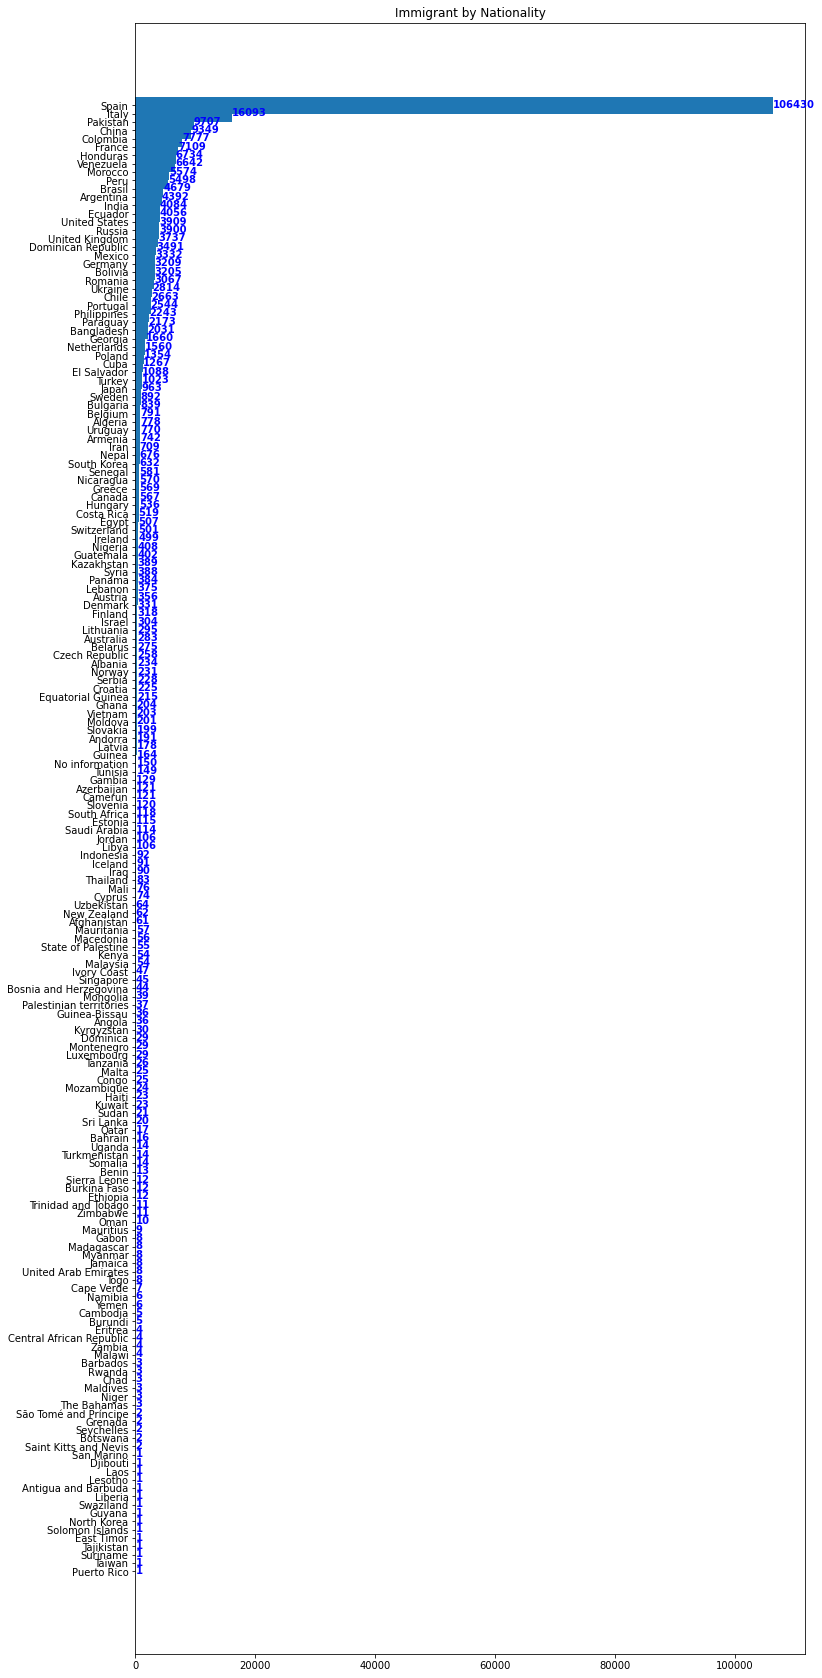

In [138]:
fig, ax = plt.subplots(figsize=(12,30))
ax.barh(dfin.index, dfin.Number, height = 2)
plt.title('Immigrants by Nationality')
for i, v in enumerate(dfin.Number):
    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
plt.show()

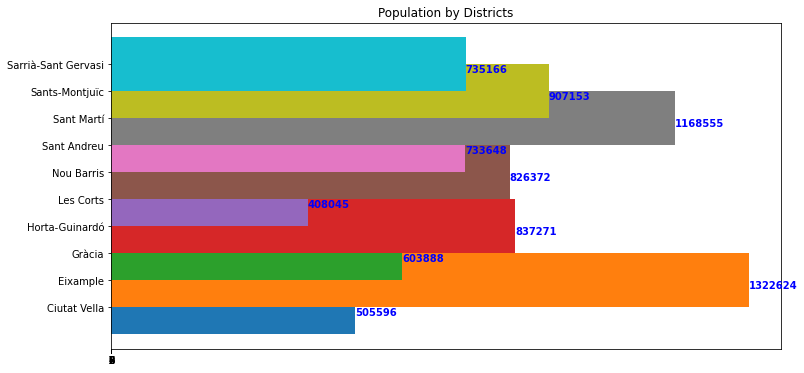

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(dfp.index, dfp.Number, height = 2, color=['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan'])
plt.title('Population by Districts')
ax.set_yticks(np.arange(len(dfp)))
for i, v in enumerate(dfp.Number):
    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
plt.show()

In [156]:
df_births = pd.read_sql("SELECT * FROM births", cnxn)
df_deaths = pd.read_sql("SELECT * FROM deaths", cnxn)

In [157]:
dfb = df_births.groupby(['District_Name']).sum()
dfb = dfb.sort_values('Number')

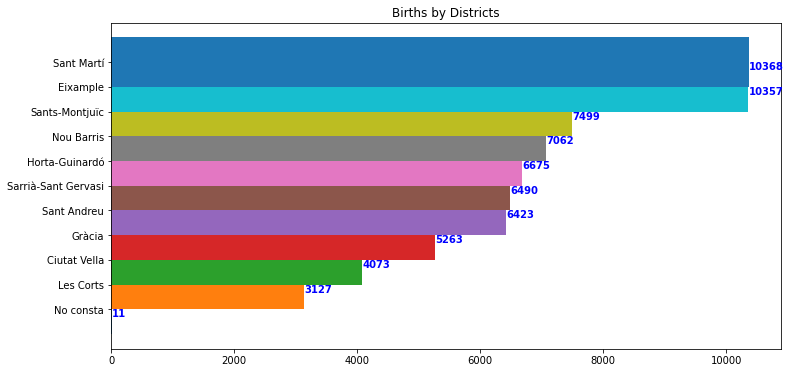

In [160]:
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(dfb.index, dfb.Number, height = 2, color=['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan'])
plt.title('Births by Districts')
ax.set_yticks(np.arange(len(dfb)))
for i, v in enumerate(dfb.Number):
    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
plt.show()

In [161]:
dfd = df_deaths.groupby(['District_Name']).sum()
dfd = dfd.sort_values('Number')

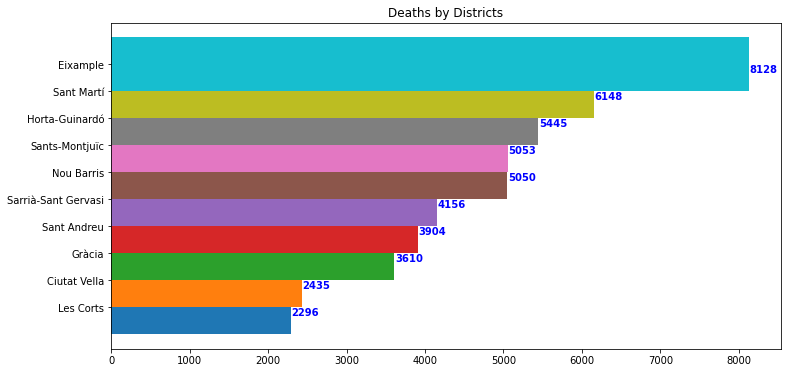

In [163]:
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(dfd.index, dfd.Number, height = 2, color=['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan'])
plt.title('Deaths by Districts')
ax.set_yticks(np.arange(len(dfd)))
for i, v in enumerate(dfd.Number):
    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
plt.show()

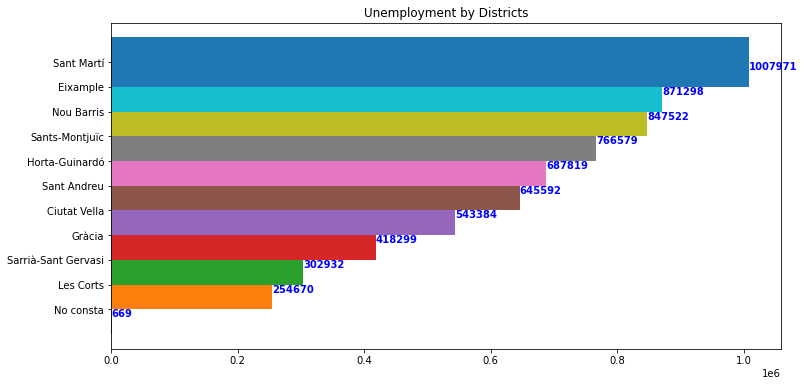

In [165]:
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(dfu.index, dfu.Number, height = 2, color=['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan'])
plt.title('Unemployment by Districts')
ax.set_yticks(np.arange(len(dfu)))
for i, v in enumerate(dfu.Number):
    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
plt.show()

In [169]:
df_immigrants_emigrants_age.groupby(['District_Name']).sum()

,Year,District_Code,Neighborhood_Code,Immigrants,Emigrants
District_Name,,,,,
Ciutat Vella,508032,252,630,35355,14171
Eixample,762048,756,2835,52700,26062
Gràcia,635040,1890,9450,20168,11009
Horta-Guinardó,1397088,4851,26334,21309,13936
Les Corts,381024,756,3780,12570,7811
No consta,127008,6237,6237,17,13
Nou Barris,1651104,6552,40950,22560,14802
Sant Andreu,889056,3969,26460,17709,12563
Sant Martí,1270080,6300,43155,35114,22470


In [181]:
dfie = df_immigrants_emigrants_age.groupby(['District_Name']).sum()

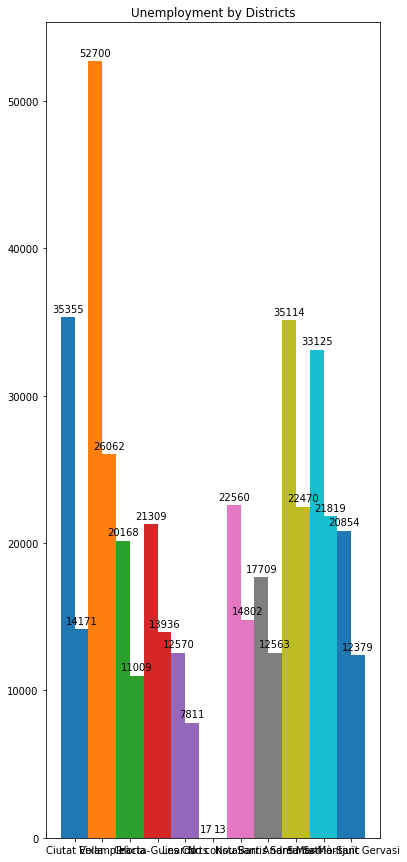

In [194]:
fig, ax = plt.subplots(figsize=(6,15))
bar_width = 0.5
indx = np.arange(len(dfie))
barImmigrants = ax.bar(indx - bar_width/2, dfie.Immigrants, width = bar_width, color=['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan'], label = 'Immigrants')
barEmigrants = ax.bar(indx + bar_width/2, dfie.Emigrants, width = bar_width, color=['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan'], label = 'Emigrants')
plt.title('Unemployment by Districts')
#ax.set_yticks(np.arange(len(dfu)))
#for i, v in enumerate(dfie.Immigrants):
#    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
#for i, v in enumerate(dfie.Emigrants):
#    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
ax.set_xticks(indx)
ax.set_xticklabels(dfie.index)
def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
        xy=(bar.get_x() + bar.get_width() / 2, bar_height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom'
    )

insert_data_labels(barImmigrants)
insert_data_labels(barEmigrants)

plt.show()

Index(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts',
       'No consta', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi'],
      dtype='object', name='District_Name')